In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0]
it is a non-cat


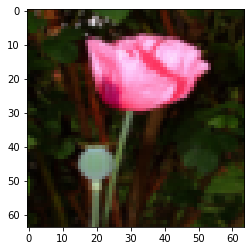

In [32]:
# Example of picture
index = 30
plt.imshow(train_set_x_orig[index])
output = train_set_y[:, index]
print('y = ' + str(output))
obj = lambda output : 'cat' if output > 0 else 'non-cat'
print('it is a ' + obj(output))

y = [1]
it is a cat


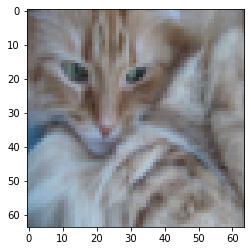

In [37]:
# Example of picture
index = 2
plt.imshow(train_set_x_orig[index])
output = train_set_y[:, index]
print('y = ' + str(output))
obj = lambda output : 'cat' if output > 0 else 'non-cat'
print('it is a ' + obj(output))

In [39]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print('The number of training examples: m_train =', str(m_train))
print('The number of testing examples: m_test =', str(m_test))
print('Height/Width of each image: num_px =', str(num_px))
print('train_set_x shape:', str(train_set_x_orig.shape))
print('train_set_y shape:', str(train_set_y.shape))
print('test_set_x shape:', str(test_set_x_orig.shape))
print('test_set_y shape:', str(test_set_y.shape))

The number of training examples: m_train = 209
The number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [40]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


12288(68x68x3)이 column vector 형태로 쭉 펴진다.

> It becomes what we saw in the lecture
```
    |  |  |  |  |  |  |  |
X = x1 x2 x3 . .. . . . xm
    |  |  |  |  |  |  |  |
   
y = [1, 0, 0, 1, 1, 1 ......]
```

In [41]:
# standardize the dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

**What you need to remember :**
1. Figure out the **dimensions** and **shapes** of the problem(m_train, m_test, num_px, ...)
2. **Reshape** the datasets such that each example is now **vector** of size (num_px * num_px * 3, 1)
3. **Standardize** the data

**Key steps :**
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

In [44]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [45]:
print('sigmoid([0, 2]) =', str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [46]:
# Initializing parameters
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [47]:
dim = 2
w, b = initialize_with_zeros(dim)
print('w = ' + str(w))
print('b = ' + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [48]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation (from X to cost)
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y)*np.log(1-A)) 
    
    # Backward propagation (to find Gradient)
    dw = 1/m * (np.dot(X, (A-Y).T))
    db = 1/m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {'dw': dw,
             'db': db}
    
    return grads, cost

In [50]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

(2, 1)
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [54]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        # Cost and Gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']
        
        # update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i%100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
    
    params = {'w': w, 
              'b': b}
    grads = {'dw': dw, 
             'db': db}
    
    return params, grads, costs

In [55]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [56]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [57]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

In [60]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost = False):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = np.zeros((X_train.shape[0], 1)), 0

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [61]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


target_label =  1
The model predicts it as non-cat


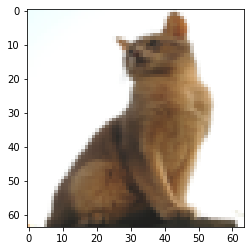

In [76]:
# Example of a picture that was wrongly classified.
index = 6

target_label = test_set_y[0, index]
print('target_label = ', str(target_label))

check = lambda x: 'cat' if x>0 else 'non-cat'
output_from_model = d['Y_prediction_test'][0, index]
print('The model predicts it as ' + str(check(output_from_model)))

plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

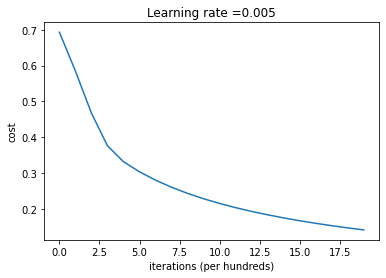

In [77]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



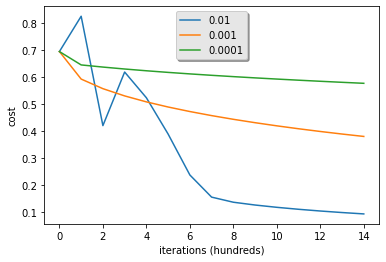

In [78]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()